# MulitiLinearRegression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

# <span style="color:Red"> Toyota Corolla, Price prediction </span>

In [2]:
toyota_corolla=pd.read_csv("ToyotaCorolla.csv",encoding= 'unicode_escape')
toyota=toyota_corolla[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
toyota.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [3]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


### Spliting the data

In [4]:
y=toyota["Price"]
x=toyota.drop(columns="Price")

### Building model with Sklear

In [5]:
model_toyota=LinearRegression()

In [6]:
model_toyota.fit(x,y)
model_toyota

LinearRegression()

In [7]:
print("Intercepts",model_toyota.intercept_)
print("Coefficent",model_toyota.coef_)

Intercepts -5573.106357913728
Coefficent [-1.21658402e+02 -2.08171292e-02  3.16809058e+01 -1.21100301e-01
 -1.61664095e+00  5.94319936e+02  3.94908076e+00  1.69586318e+01]


### Model Evaluation

In [8]:
prediction=model_toyota.predict(x)

In [9]:
r2_score(y,prediction)

0.8637627463428191

## Checking LinearRegression Assumptions

## There are 5 Assumption of Linear regression
- Linear Relationship: The relationship between the independent and dependent variables should be linear. This can be tested using scatter plots.
- Multivariate Normal: All the variables together should be multivariate normal. For all the variables to be multivariate normal each variable separately has to be univariate normal means a bell shaped curve.And any subset of variables should also be multivariate normal. This can be tested by plotting a histogram.
- No Multicollinearity: There is little or no multicollinearity in the data. Multicollinearity happens when the independent variables are highly correlated with each other. Multicollinearity can be tested with correlation matrix.
- No Autocorrelation: There is little or no autocorrelation in the data. Autocorrelation means a single column data values are related to each other. In other words f(x+1)is dependent on value of f(x). Autocorrelation can be tested with scatter plots.
- Homoscedasticity: Homoscedasticity is there. This means “same variance” .In other words residuals are equal across regression line. Homoscedasticity can also be tested using scatter plot.

### Checking Linear Relationship

Text(0.5, 1.0, 'Weight')

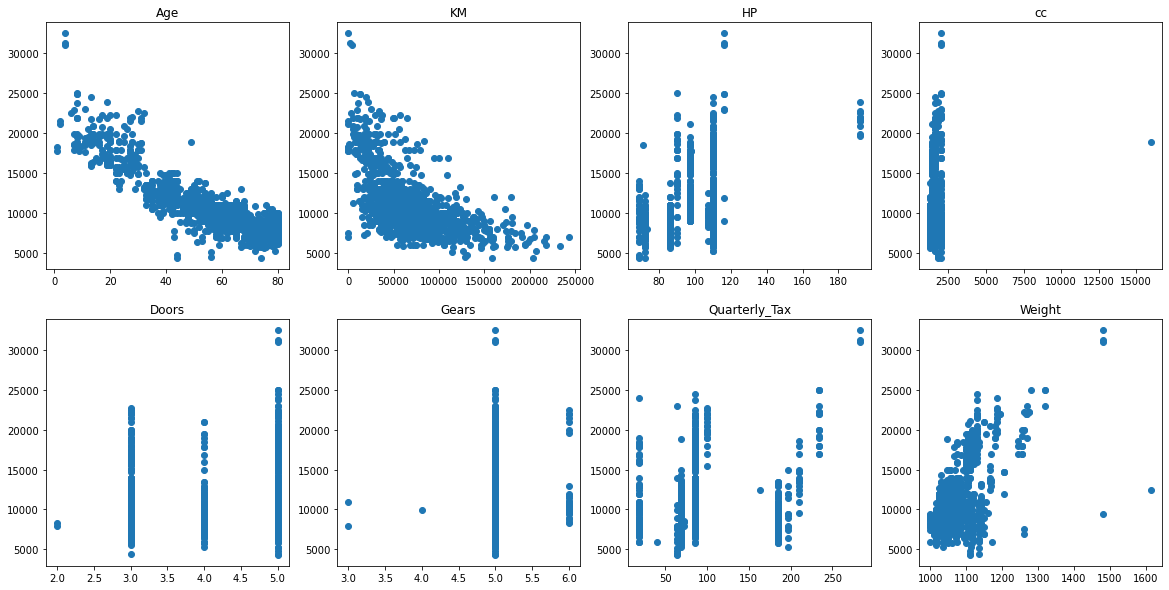

In [10]:
plt.subplots(figsize=(20,10))
plt.subplot(241)
plt.scatter(toyota["Age_08_04"],toyota["Price"])
plt.title("Age")
plt.subplot(242)
plt.scatter(toyota["KM"],toyota["Price"])
plt.title("KM")
plt.subplot(243)
plt.scatter(toyota["HP"],toyota["Price"])
plt.title("HP")
plt.subplot(244)
plt.scatter(toyota["cc"],toyota["Price"])
plt.title("cc")
plt.subplot(245)
plt.scatter(toyota["Doors"],toyota["Price"])
plt.title("Doors")
plt.subplot(246)
plt.scatter(toyota["Gears"],toyota["Price"])
plt.title("Gears")
plt.subplot(247)
plt.scatter(toyota["Quarterly_Tax"],toyota["Price"])
plt.title("Quarterly_Tax")
plt.subplot(248)
plt.scatter(toyota["Weight"],toyota["Price"])
plt.title("Weight")

### Checking Multivarient Normal

Text(0.5, 1.0, 'Weight')

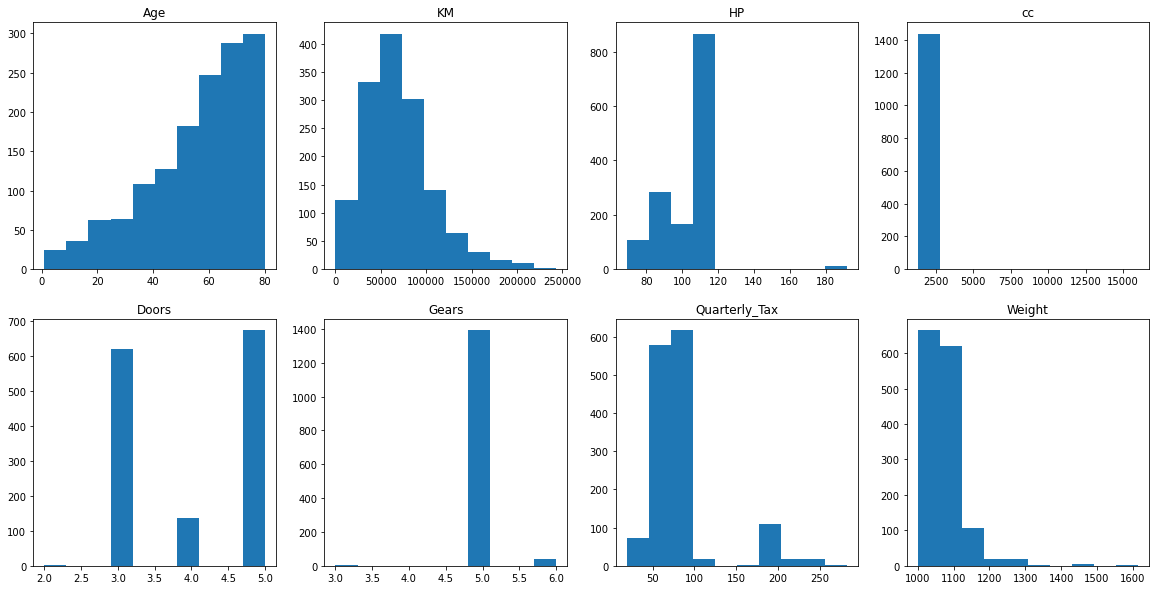

In [11]:
plt.subplots(figsize=(20,10))
plt.subplot(241)
plt.hist(toyota["Age_08_04"])
plt.title("Age")
plt.subplot(242)
plt.hist(toyota["KM"])
plt.title("KM")
plt.subplot(243)
plt.hist(toyota["HP"])
plt.title("HP")
plt.subplot(244)
plt.hist(toyota["cc"])
plt.title("cc")
plt.subplot(245)
plt.hist(toyota["Doors"])
plt.title("Doors")
plt.subplot(246)
plt.hist(toyota["Gears"])
plt.title("Gears")
plt.subplot(247)
plt.hist(toyota["Quarterly_Tax"])
plt.title("Quarterly_Tax")
plt.subplot(248)
plt.hist(toyota["Weight"])
plt.title("Weight")

#### Some Features are not normally distributed

### Checking Multicolinearity

In [12]:
### VIF CHECK
vif_age=smf.ols("Age_08_04 ~ KM + HP + cc + Doors + Gears + Quarterly_Tax + Weight ",data=x).fit().rsquared
vif_age=1/(1-vif_age)
vif_km=smf.ols("KM ~ Age_08_04 + HP + cc + Doors + Gears + Quarterly_Tax + Weight ",data=x).fit().rsquared
vif_km=1/(1-vif_km)
vif_hp=smf.ols("HP ~ KM + Age_08_04 + cc + Doors + Gears + Quarterly_Tax + Weight ",data=x).fit().rsquared
vif_hp=1/(1-vif_hp)
vif_cc=smf.ols("cc ~ KM + HP + Age_08_04 + Doors + Gears + Quarterly_Tax + Weight ",data=x).fit().rsquared
vif_cc=1/(1-vif_cc)
vif_doors=smf.ols("Doors ~ KM + HP + cc + Age_08_04 + Gears + Quarterly_Tax + Weight ",data=x).fit().rsquared
vif_doors=1/(1-vif_doors)
vif_gears=smf.ols("Gears ~ KM + HP + cc + Doors + Age_08_04 + Quarterly_Tax + Weight ",data=x).fit().rsquared
vif_gears=1/(1-vif_gears)
vif_qt=smf.ols("Quarterly_Tax ~ KM + HP + cc + Doors + Gears + Age_08_04 + Weight ",data=x).fit().rsquared
vif_qt=1/(1-vif_qt)
vif_w=smf.ols("Weight ~ KM + HP + cc + Doors + Gears + Quarterly_Tax + Age_08_04 ",data=x).fit().rsquared
vif_w=1/(1-vif_w)
df=pd.DataFrame({"Name":["Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"],
                "VIF":[vif_age,vif_km,vif_hp,vif_cc,vif_doors,vif_gears,vif_qt,vif_w]})
df

,Name,VIF
0,Age_08_04,1.884620
1,KM,1.756905
2,HP,1.419422
3,cc,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,Quarterly_Tax,2.311431
7,Weight,2.516420


In [13]:
x.corr()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Age_08_04,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


#### We can se that weight and Quarterly tax are highly correlated with pearson correlation coefficent of 0.6, also KM and Age are highly correlated with pearson correlation coefficent of 0.5

In [14]:
model=smf.ols("Price ~ Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data=toyota).fit()

In [15]:
model.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [16]:
model.rsquared,model.rsquared_adj

(0.8637627463428192, 0.8629989775766963)

### Test for Normality of residuals

In [17]:
residuels=model.resid

E:\Anaconda\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

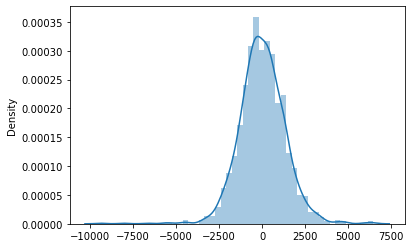

In [18]:
sns.distplot(residuels)

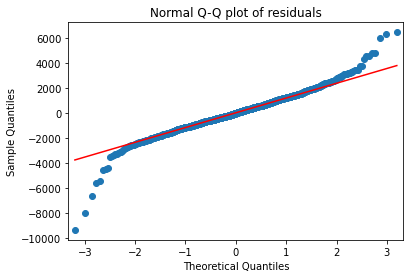

In [19]:
import statsmodels.api as sm
qqplot=sm.qqplot(residuels, line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

### Residual Plot for Homoscedasticity

In [20]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

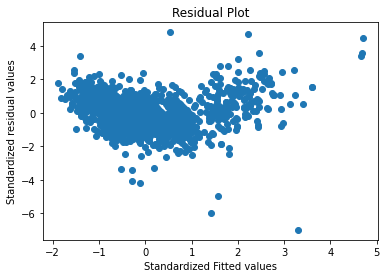

In [21]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(residuels))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

### High Influence points

<Figure size 1440x720 with 0 Axes>

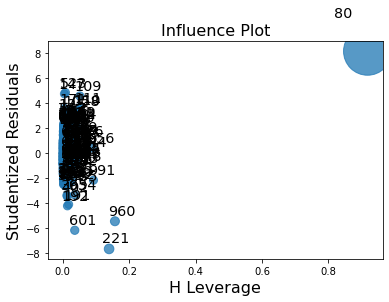

In [22]:
from statsmodels.graphics.regressionplots import influence_plot
plt.figure(figsize = (20,10))
influence_plot(model)
plt.show()

In [23]:
toyota.iloc[80,:]

Price            18950
Age_08_04           25
KM               20019
HP                 110
cc               16000
Doors                5
Gears                5
Quarterly_Tax      100
Weight            1180
Name: 80, dtype: int64

### Let's try to build model without this point

### Improving model

In [24]:
toyota_df=toyota.drop(toyota.index[80],axis=0).reset_index()
toyota_df.head()

,index,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170


In [25]:
toyota_df.drop(columns="index",inplace=True)

In [26]:
final_ml=smf.ols("Price ~ Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data=toyota_df).fit()

In [27]:
final_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1186.
Date:                Fri, 24 Feb 2023   Prob (F-statistic):               0.00
Time:                        13:21:22   Log-Likelihood:                -12335.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1426   BIC:                         2.473e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6284.7401   1382.748     -4.545      0.000   -8997.180   -3572.301
Age_08_04      -120.4550      2.562    -47.021      0.000    -125.480    -115.430
KM               -0.0178      0.001    -13.973      0.000      -0.020      -0.015
HP               39.3463      2.911     13.516      0.000      33.636      45.057
cc               -2.5242      0.307     -8.216      0.000      -3.127      -1.922
Doors           -27.2285     39.241     -0.694      0.488    -104.206      49.749
Gears           523.9416    192.865      2.717      0.007     145.612     902.271
Quarterly_Tax     9.0440      1.425      6.348      0.000       6.249      11.839
Weight           20.1655      1.116     18.076      0.000      17.977      22.354
==============================================================================
Omnibus:                      246.945   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2706.374
Skew:                          -0.443   Prob(JB):                         0.00
Kurtosis:                       9.669   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model has improved by some extinct

# <span style="color:Red"> Startup Data, Profit Prediction </span>

In [28]:
startup=pd.read_csv("50_startups.csv")

In [29]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [30]:
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [31]:
y=startup["Profit"]
x=startup.drop(columns="Profit")

### Applying one-hot incoding on catagorical columns

In [32]:
x=pd.get_dummies(data=x,columns=["State"])
x.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0


## Creating basic model with sklearn

In [33]:
m_startup=LinearRegression()
m_startup.fit(x,y)

LinearRegression()

In [34]:
print("Intercept : ",m_startup.intercept_)
print("Coefficent :",m_startup.coef_ )

Intercept :  50177.64442285087
Coefficent : [ 8.06023114e-01 -2.70043196e-02  2.69798610e-02 -5.23005912e+01
  1.46488202e+02 -9.41876104e+01]


In [35]:
predictions=m_startup.predict(x)
r2_score(y,predictions)

0.9507524843355148

#### Model is performing good in train data

## Checking LinearRegression Assumptions

### Checking Linear Relationship & Muilti Varient Normal

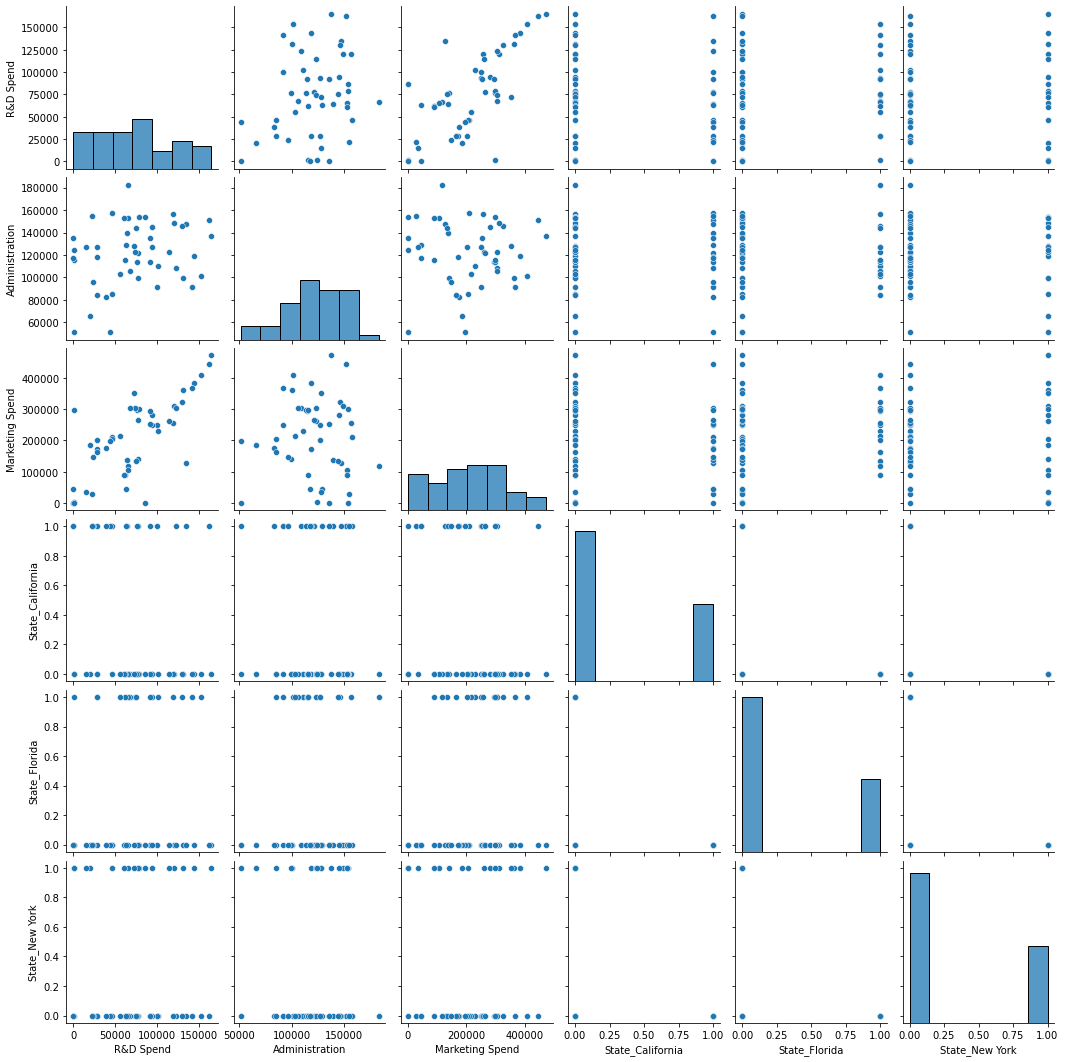

In [36]:
sns.pairplot(x)

### Checking Multicolinearity

In [37]:
x=x.rename(columns={"R&D Spend":"RD_Spend","Marketing Spend":"Marketing_Spend","State_New York":"State_New_York"})

In [38]:
vif_r=smf.ols("RD_Spend ~ Administration + Marketing_Spend + State_California + State_Florida + State_New_York",data=x).fit().rsquared
vif_age=1/(1-vif_r)
vif_age

2.4955109215494433

In [39]:
### VIF CHECK
vif_spend=smf.ols("RD_Spend ~ Administration + Marketing_Spend + State_California + State_Florida + State_New_York",data=x).fit().rsquared
vif_spend=1/(1-vif_spend)
vif_adm=smf.ols("Administration ~ RD_Spend + Marketing_Spend + State_California + State_Florida + State_New_York",data=x).fit().rsquared
vif_adm=1/(1-vif_adm)
vif_m=smf.ols("Marketing_Spend ~ RD_Spend + Administration + State_California + State_Florida + State_New_York",data=x).fit().rsquared
vif_m=1/(1-vif_m)
vif_cali=smf.ols("State_California ~ RD_Spend + Administration + Marketing_Spend + State_Florida + State_New_York",data=x).fit().rsquared
vif_cali=1/(1-vif_cali)
vif_flori=smf.ols("State_Florida ~ RD_Spend + Administration + Marketing_Spend + State_California + State_New_York",data=x).fit().rsquared
vif_flori=1/(1-vif_flori)
vif_ny=smf.ols("State_New_York ~ RD_Spend + Administration + Marketing_Spend + State_California + State_Florida",data=x).fit().rsquared
vif_ny=1/(1-vif_ny)
df=pd.DataFrame({"Name":["R&D_Spend","Administration","Marketing_Spend","State_California","State_Florida","State_New_York"],
                "VIF":[vif_spend,vif_adm,vif_m,vif_cali,vif_flori,vif_ny]})
df

C:\Users\cpakh\AppData\Local\Temp\ipykernel_27148\190241041.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  vif_cali=1/(1-vif_cali)
C:\Users\cpakh\AppData\Local\Temp\ipykernel_27148\190241041.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  vif_flori=1/(1-vif_flori)
C:\Users\cpakh\AppData\Local\Temp\ipykernel_27148\190241041.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  vif_ny=1/(1-vif_ny)


,Name,VIF
0,R&D_Spend,2.495511
1,Administration,1.177766
2,Marketing_Spend,2.416797
3,State_California,inf
4,State_Florida,inf
5,State_New_York,inf


In [40]:
x.corr()

,RD_Spend,Administration,Marketing_Spend,State_California,State_Florida,State_New_York
RD_Spend,1.000000,0.241955,0.724248,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,-0.015478,0.010493,0.005145
Marketing_Spend,0.724248,-0.032154,1.000000,-0.168875,0.205685,-0.033670
State_California,-0.143165,-0.015478,-0.168875,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,-0.492366,1.000000,-0.492366
State_New_York,0.039068,0.005145,-0.033670,-0.515152,-0.492366,1.000000


##### We can see that `Marketing` and `R&D Spend` are highly correlated

In [41]:
startup_F=pd.get_dummies(data=startup,columns=["State"])

In [42]:
startup_F.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [43]:
startup_F.rename(columns={"R&D Spend":"RD_Spend","Marketing Spend":"Marketing_Spend","State_New York":"State_New_York"},inplace=True)
startup_F.head()


,RD_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_New_York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [44]:
model=smf.ols("Profit ~ RD_Spend + Administration + Marketing_Spend + State_California + State_Florida + State_New_York",data=startup_F).fit()

In [45]:
model.params

Intercept           37633.233317
RD_Spend                0.806023
Administration         -0.027004
Marketing_Spend         0.026980
State_California    12492.110514
State_Florida       12690.899307
State_New_York      12450.223495
dtype: float64

In [46]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Fri, 24 Feb 2023   Prob (F-statistic):           1.34e-27
Time:                        13:21:27   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.763e+04   5073.636      7.417      0.000    2.74e+04    4.79e+04
RD_Spend             0.8060      0.046     17.369      0.000       0.712       0.900
Administration      -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketing_Spend      0.0270      0.017      1.574      0.123      -0.008       0.062
State_California  1.249e+04   2449.797      5.099      0.000    7554.868    1.74e+04
State_Florida     1.269e+04   2726.700      4.654      0.000    7195.596    1.82e+04
State_New_York    1.245e+04   2486.364      5.007      0.000    7439.285    1.75e+04
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     3.84e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.63e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Test of normality and Residual

In [47]:
residuel=model.resid

E:\Anaconda\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

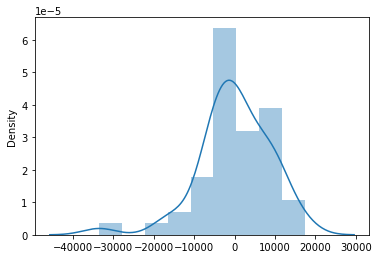

In [48]:
sns.distplot(residuel)

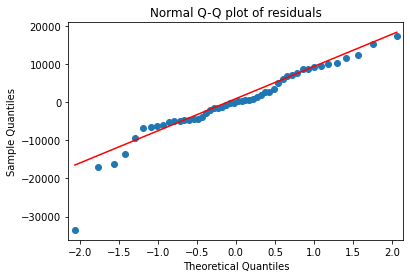

In [49]:
import statsmodels.api as sm
qqplot=sm.qqplot(residuel, line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

### Residual Plot for Homoscedasticity

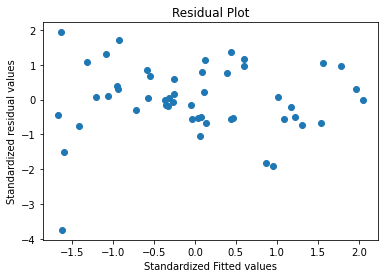

In [50]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(residuel))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## To check improvemnet in model
## High influence points

<Figure size 1440x720 with 0 Axes>

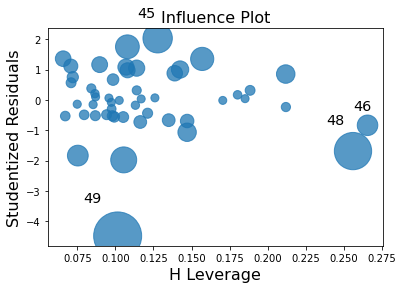

In [51]:
from statsmodels.graphics.regressionplots import influence_plot
plt.figure(figsize = (20,10))
influence_plot(model)
plt.show()

#### On an average there are two point 48,49 but making changes with those points won't make much differance

## Hence, we go with our base model